In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

In [2]:
### Load data

In [3]:
pX = pd.read_csv('./Periodic/X.csv')
# Drop the time stamp column
pY = pd.read_csv('./Periodic/Y.csv')

In [4]:
ppc = pd.read_csv('./Periodic/read_p_c.csv')
ppc_f= ppc.iloc[0:,0].tolist()
ptb = pd.read_csv('./Periodic/read_t_b.csv')
ptb_f= ptb.iloc[0:,0].tolist()
parr = pd.read_csv('./Periodic/read_arr.csv')
parr_f= parr.iloc[0:,0].tolist()

In [5]:
pX_features = list(pX.columns)
pX_features.remove('TimeStamp')
pX_ = pX[pX_features]

In [6]:
### PCA

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pX_std = StandardScaler().fit_transform(pX_)
pX_std_pca = pca.fit_transform(pX_std)[:,:2]

In [8]:
### get random points to visulize

In [11]:
### Analyse the target value

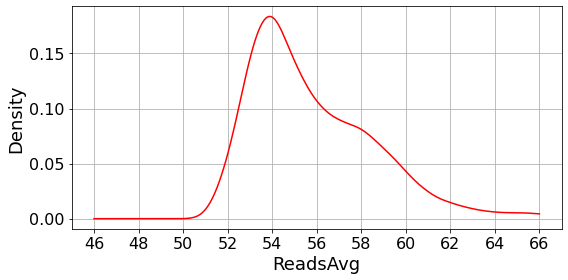

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

pY['ReadsAvg'].plot.kde(ax=axes,ind=np.linspace(46,66,200),color='r');
#X['tps'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');

# Customizing plot (changing font size, labels)
font_size=18
axes.set_xlabel('ReadsAvg', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
#plt.xlim([40, 100])
plt.tight_layout()
#plt.savefig(r"\kth course\network analytics\project\pic\1.3.c1.png",dpi=300)

In [13]:
per_25=np.percentile(pY['ReadsAvg'], 25)
per_50=np.percentile(pY['ReadsAvg'], 50)
per_75=np.percentile(pY['ReadsAvg'], 75)

### Explaination

In [141]:
# The density plot of the target shows that 54 is a turning point
#,which can be used as the threshold for classification

In [ ]:
def getRandomIndex(n, x):
    index = np.random.choice(np.arange(n), size=x, replace=False)
    return index

In [18]:
visualize_index = np.array(getRandomIndex(pX.shape[0], 100))
visualize_index=np.sort(visualize_index)

pY_sample=np.array(pY.iloc[visualize_index,:]['ReadsAvg'])
for i in range(0,len(pY_sample)):
    if pY_sample[i]<per_50:
        pY_sample[i]=1
    else:
        pY_sample[i]=2
pY_sample=pY_sample.astype(int)

In [167]:
'''
pY_sample=np.array(pY.iloc[visualize_index,:]['ReadsAvg'])
turning=55.2
for i in range(0,len(pY_sample)):
    if pY_sample[i]<per_25:
        pY_sample[i]=1
    elif pY_sample[i]<per_50:
        pY_sample[i]=2
    elif pY_sample[i]<per_75:
        pY_sample[i]=3
    else:
        pY_sample[i]=4
pY_sample=pY_sample.astype(int)
'''

In [16]:
pX_pca_sample=pX_std_pca[visualize_index,:]
pX_pc_sample=np.array(pX.iloc[visualize_index,:][ppc_f[0:2]])
pX_tb_sample=np.array(pX.iloc[visualize_index,:][ptb_f[0:2]])
pX_arr_sample=np.array(pX.iloc[visualize_index,:][parr_f[0:2]])

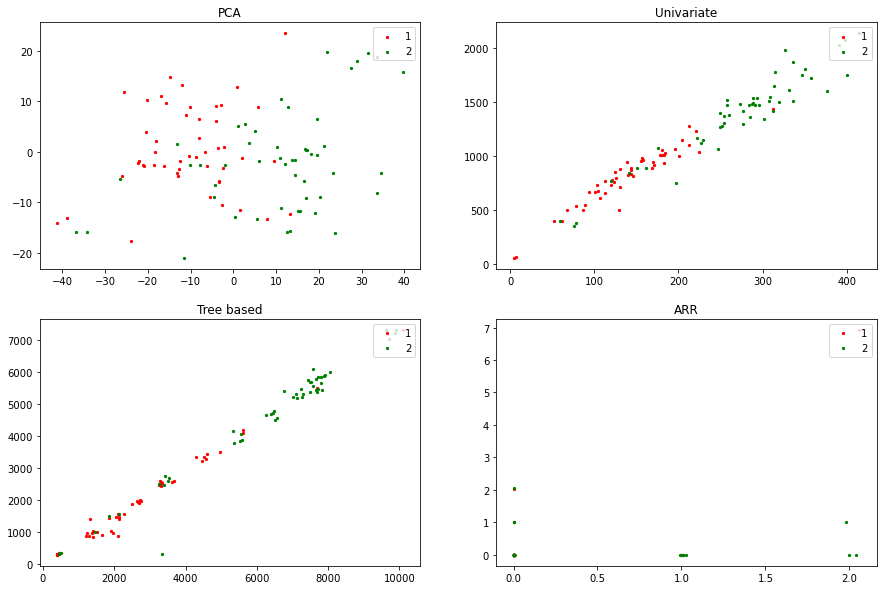

In [17]:
cdict = {1:'red',2:'green',3:'blue',4:'cyan'}
pointsize=5
f, ax = plt.subplots(2,2,figsize=(15,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax1.scatter(pX_pca_sample[idx,0], pX_pca_sample[idx,1], c = cdict[g],label = g, s=pointsize)
ax1.legend(loc="upper right")
ax1.set_title('PCA')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax2.scatter(pX_pc_sample[idx,0], pX_pc_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax2.legend(loc="upper right")
ax2.set_title('Univariate')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax3.scatter(pX_tb_sample[idx,0], pX_tb_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax3.legend(loc="upper right")
ax3.set_title('Tree based')

for g in np.unique(pY_sample):
    idx = np.where(pY_sample == g)
    ax4.scatter(pX_arr_sample[idx,0], pX_arr_sample[idx,1], c = cdict[g], label = g,s=pointsize)
ax4.legend(loc="upper right")
ax4.set_title('ARR')
plt.savefig("./Fig/classfication.png",dpi=300,bbox_inches='tight')
plt.show()

In [153]:
print(pX.iloc[1836,0])
print(pX.iloc[2929,0])
print(pX.iloc[4175,0])

2016-11-20 08:00:04
2016-11-20 08:30:01
2016-11-20 09:00:01


In [154]:
continous_index = range(1836,4175,50)

pY_contin=np.array(pY.iloc[continous_index,:]['ReadsAvg'])
for i in range(0,len(pY_contin)):
    if pY_contin[i]<per_50:
        pY_contin[i]=1
    else:
        pY_contin[i]=2
pY_contin=pY_contin.astype(int)
pX_pca_contin=pX_std_pca[continous_index,:]
pX_pc_contin=np.array(pX.iloc[continous_index,:][ppc_f[0:2]])
pX_tb_contin=np.array(pX.iloc[continous_index,:][ptb_f[0:2]])
pX_arr_contin=np.array(pX.iloc[continous_index,:][parr_f[0:2]])

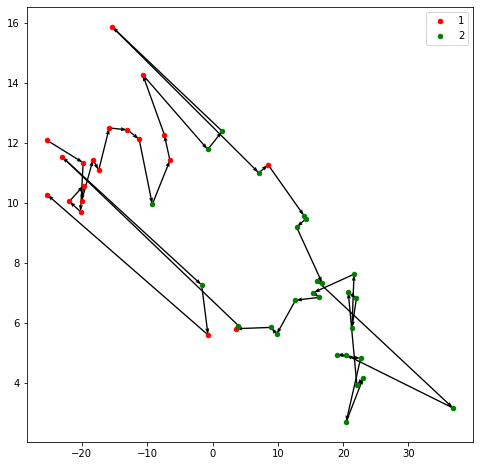

In [155]:
pointsize=20
fig, ax = plt.subplots(figsize=(8,8))
x=pX_pca_contin[:,0]
y=pX_pca_contin[:,1]
ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003)
#ax.quiver(pX_pca_contin[:,0][:-1], pX_pca_contin[:,1][:-1],pX_pca_contin[1:]-pX_pca_contin[:-1], pX_pca_contin[1:]-pX_pca_contin[:-1], scale_units='xy', angles='xy', scale=1)
for g in np.unique(pY_contin):
    idx = np.where(pY_contin == g)
    ax.scatter(pX_pca_contin[idx,0], pX_pca_contin[idx,1], c = cdict[g],label = g, s=pointsize)
ax.legend(loc="upper right")
#ax.legend(loc="upper right")
#plt.savefig("./Fig/pca_contin.png",dpi=300,bbox_inches='tight')
plt.show()

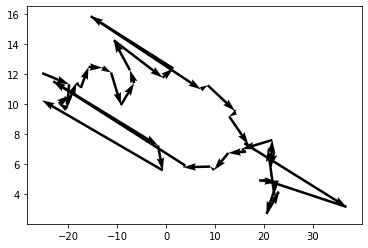

In [137]:


plt.figure()


plt.show()

In [129]:
y[:-1]

array([ 0.        ,  0.64278761,  0.98480775,  0.8660254 ,  0.34202014,
       -0.34202014, -0.8660254 , -0.98480775, -0.64278761])

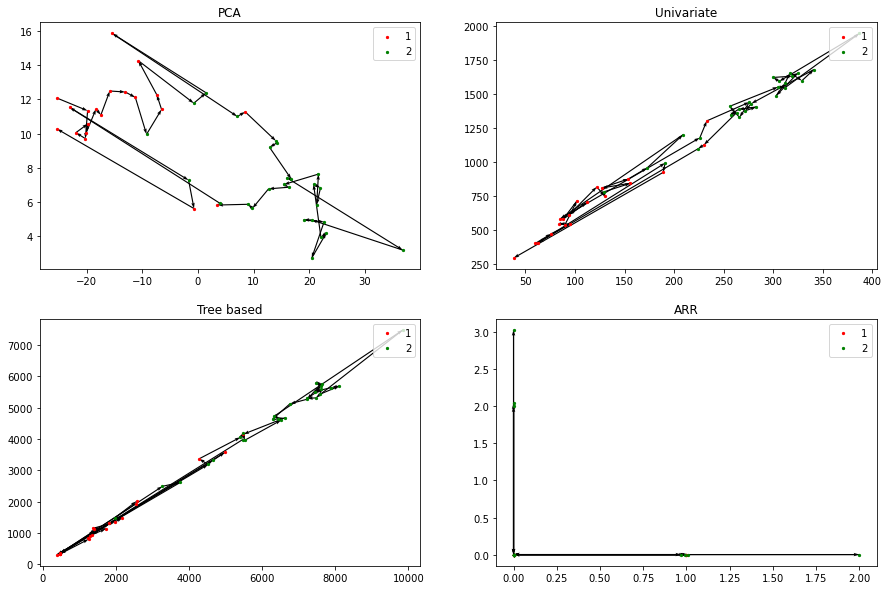

In [156]:
cdict = {1:'red',2:'green',3:'blue',4:'cyan'}
pointsize=5
f, ax = plt.subplots(2,2,figsize=(15,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

x=pX_pca_contin[:,0]
y=pX_pca_contin[:,1]
ax1.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003)
for g in np.unique(pY_contin):
    idx = np.where(pY_contin == g)
    ax1.scatter(pX_pca_contin[idx,0], pX_pca_contin[idx,1], c = cdict[g],label = g, s=pointsize)
ax1.legend(loc="upper right")
ax1.set_title('PCA')

x=pX_pc_contin[:,0]
y=pX_pc_contin[:,1]
ax2.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003)
for g in np.unique(pY_contin):
    idx = np.where(pY_contin == g)
    ax2.scatter(pX_pc_contin[idx,0], pX_pc_contin[idx,1], c = cdict[g], label = g,s=pointsize)
ax2.legend(loc="upper right")
ax2.set_title('Univariate')

x=pX_tb_contin[:,0]
y=pX_tb_contin[:,1]
ax3.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003)
for g in np.unique(pY_contin):
    idx = np.where(pY_contin == g)
    ax3.scatter(pX_tb_contin[idx,0], pX_tb_contin[idx,1], c = cdict[g], label = g,s=pointsize)
ax3.legend(loc="upper right")
ax3.set_title('Tree based')

x=pX_arr_contin[:,0]
y=pX_arr_contin[:,1]
ax4.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003)
for g in np.unique(pY_contin):
    idx = np.where(pY_contin == g)
    ax4.scatter(pX_arr_contin[idx,0], pX_arr_contin[idx,1], c = cdict[g], label = g,s=pointsize)
ax4.legend(loc="upper right")
ax4.set_title('ARR')
#plt.savefig("./Fig/p_continious.png",dpi=300,bbox_inches='tight')
plt.show()